In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import mne

filename = "X_train/X_train.h5"

eeg1 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_1'])))




In [ ]:
eeg2 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_2'])))
eeg3 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_3'])))
eeg4 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_4'])))
eeg5 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_5'])))
eeg6 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_6'])))
eeg7 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_7'])))
index = np.array( pd.DataFrame(np.array(h5py.File(filename)['index'])))
indexwindow = np.array( pd.DataFrame(np.array(h5py.File(filename)['index_window'])))
indexabsolute = np.array( pd.DataFrame(np.array(h5py.File(filename)['index_absolute'])))
pulse = np.array( pd.DataFrame(np.array(h5py.File(filename)['pulse'])))
x = np.array( pd.DataFrame(np.array(h5py.File(filename)['x'])))
y = np.array( pd.DataFrame(np.array(h5py.File(filename)['y'])))
z =np.array( pd.DataFrame(np.array(h5py.File(filename)['z'])))

In [2]:
filename='y_train.csv'

ytrain=np.array(pd.read_csv(filename))

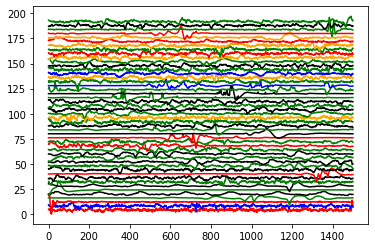

In [3]:
eeg1norm=np.divide(eeg1,np.sqrt(np.reshape(np.var(eeg1,axis=1),(24688,1))))  #all time series have a std deviation of 1.
colors=['blue','red','green','black','orange']
space,count=5,0
for i in range(space,1000,space):
    if ytrain[i-space,1]!=ytrain[i,1]:
        count+=1
        plt.plot(eeg1norm[i]+4*count,color=colors[ytrain[i,1]])

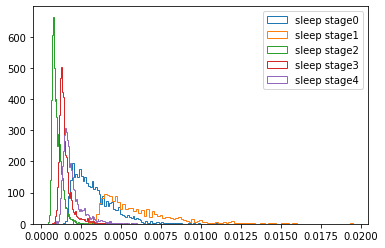

In [4]:
for i in range(5):
    plt.hist((np.max(eeg1norm,axis=1)-np.min(eeg1norm,axis=1))[np.where(ytrain[:,1]==i)]/np.count_nonzero(ytrain[:,1]== i),bins=100,histtype='step',label='sleep stage'+str(i))
    plt.legend()

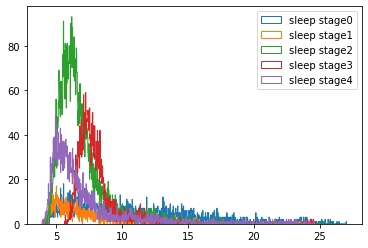

In [5]:
for i in range(5):
    plt.hist(np.log(np.var(eeg1,axis=1)[np.where(ytrain[:,1]==i)])/len(np.where(ytrain[:,1]==i)),bins=1000,histtype='step',label='sleep stage'+str(i))
    plt.legend()

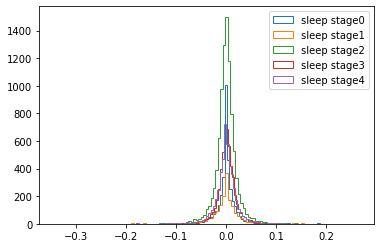

In [6]:
for i in range(5):
    plt.hist(np.mean(eeg1norm,axis=1)[np.where(ytrain[:,1]==i)]/len(np.where(ytrain[:,1]==i)),bins=100,histtype='step',label='sleep stage'+str(i))
    plt.legend()

Let us now have the highest power frequency using the fft of power
$I_{norm1}(t)=eeg1norm^2(t) $ \\


$f= \frac{\int_0^{+\infty} A(\nu)\nu d\nu}{\int_0^{+\infty} A(\nu) d\nu}$ with $A(\nu)=FFT[I_{norm}(t)]_{30s}$


In [11]:
Ieeg1norm=eeg1norm**2
freq=np.fft.fftfreq(Ieeg1norm.shape[1],d=1/50.0)
A=np.fft.fft(Ieeg1norm,axis=1)
A.shape

(24688, 1500)

(24688, 750) (750,)


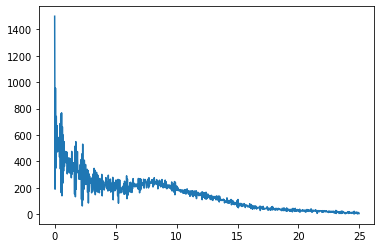

In [20]:
freq2,A2=freq[:int(freq.shape[0]/2)],abs(A[:,:int(freq.shape[0]/2)])
print(A2.shape,freq2.shape)
f=np.sum(A2*freq2,axis=1)/np.sum(A2,axis=1)
f.shape
plt.plot(freq2,A2[100])


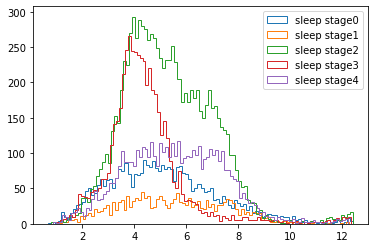

In [17]:
for i in range(5):
    plt.hist(f[np.where(ytrain[:,1]==i)]/len(np.where(ytrain[:,1]==i)),bins=100,histtype='step',label='sleep stage'+str(i))
    plt.legend()
    